In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TTI

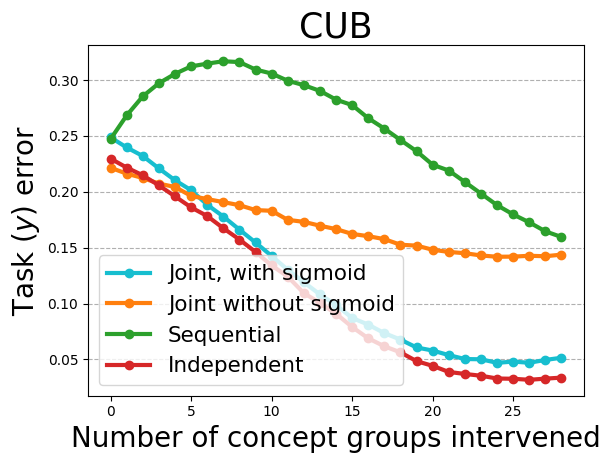

In [2]:
data = [('Joint, with sigmoid', '#17becf', [75.1294, 76.0269, 76.7921, 77.9024, 78.9610, 79.8527, 81.1529, 82.2057, 83.3794, 84.5300, 85.7381, 86.9693, 88.0796, 89.1842, 90.1277, 91.2841, 91.8824, 92.6418, 93.2229, 93.9247, 94.2009, 94.6094, 94.9603, 94.9833, 95.2997, 95.1904, 95.2940, 95.0408, 94.8452]),
        ('Joint without sigmoid', '#ff7f0e', [77.8449, 78.3684, 78.7596, 79.2602, 79.5651, 80.3647, 80.6466, 80.9170, 81.1932, 81.6304, 81.6937, 82.5049, 82.6832, 83.0284, 83.3333, 83.7648, 83.9662, 84.2308, 84.7313, 84.8119, 85.1801, 85.3757, 85.4907, 85.6921, 85.8072, 85.7957, 85.7209, 85.7611, 85.6173]),
        ('Sequential', '#2ca02c', [75.2733, 73.1619, 71.4532, 70.2796, 69.4397, 68.7723, 68.5249, 68.3120, 68.3868, 69.0542, 69.4109, 70.0552, 70.4522, 70.9642, 71.7466, 72.2356, 73.4093, 74.3355, 75.3596, 76.3606, 77.5745, 78.0923, 79.1163, 80.1519, 81.1932, 82.0216, 82.7293, 83.5347, 84.0410]),
        ('Independent', '#d62728', [77.0280, 77.8276, 78.5180, 79.4212, 80.4050, 81.3888, 82.1655, 83.2528, 84.2653, 85.3757, 86.5838, 87.5791, 89.0576, 89.9436, 90.9044, 92.0953, 93.1078, 93.8212, 94.3620, 95.1502, 95.5701, 96.1167, 96.2950, 96.4561, 96.7035, 96.7265, 96.8185, 96.7150, 96.6229])]
xs = range(29)
for name, color, ys in data:
    ys = [1 - y / 100. for y in ys]
    plt.plot(xs, ys, marker='.', fillstyle='full', color=color, label=name, linewidth=3.0, markersize=12.0)
plt.rcParams["figure.figsize"] = (12, 6)
plt.title('CUB', fontsize=25)
plt.legend(loc='lower left', prop={'size': 15.5})
plt.xlabel('Number of concept groups intervened', fontsize=20)
plt.ylabel('Task ($y$) error', fontsize=20)
plt.gca().yaxis.grid(True, linestyle='--')
plt.subplots_adjust(wspace=0.25, bottom=0.15)
plt.show()

# pointing game

In [3]:
import pickle

In [4]:
IG_dist = pickle.load(open("./results/pointing_game/IG/pointing_game_values.pkl", "rb"))
LRP_dist = pickle.load(open("./results/pointing_game/LRP/pointing_game_values.pkl", "rb"))

In [30]:
for key in range(len(LRP_dist)):
	print(key, len(LRP_dist[key]), len(LRP_dist[key])*0.01, len(LRP_dist[key])*0.1, len(LRP_dist[key])*0.5)
	print(len(sorted(LRP_dist[key][:int(len(LRP_dist[key])*0.1)])))
	print(sorted(LRP_dist[key])[:int(len(LRP_dist[key])*0.1)])

0 1495 14.950000000000001 149.5 747.5
149
[1.0, 5.0990195135927845, 6.0, 6.082762530298219, 6.082762530298219, 6.708203932499369, 6.708203932499369, 6.708203932499369, 7.211102550927978, 7.211102550927978, 7.211102550927978, 7.211102550927978, 7.615773105863909, 8.0, 8.06225774829855, 8.06225774829855, 8.54400374531753, 8.54400374531753, 8.602325267042627, 9.486832980505138, 10.0, 10.0, 10.198039027185569, 10.44030650891055, 10.63014581273465, 10.770329614269007, 10.770329614269007, 10.816653826391969, 10.816653826391969, 12.206555615733702, 12.36931687685298, 12.36931687685298, 12.36931687685298, 13.038404810405298, 13.038404810405298, 13.038404810405298, 14.142135623730951, 14.317821063276353, 14.317821063276353, 14.317821063276353, 14.866068747318506, 15.231546211727817, 15.297058540778355, 15.297058540778355, 15.652475842498529, 15.652475842498529, 15.811388300841896, 15.811388300841896, 16.278820596099706, 16.401219466856727, 16.401219466856727, 16.401219466856727, 16.970562748477

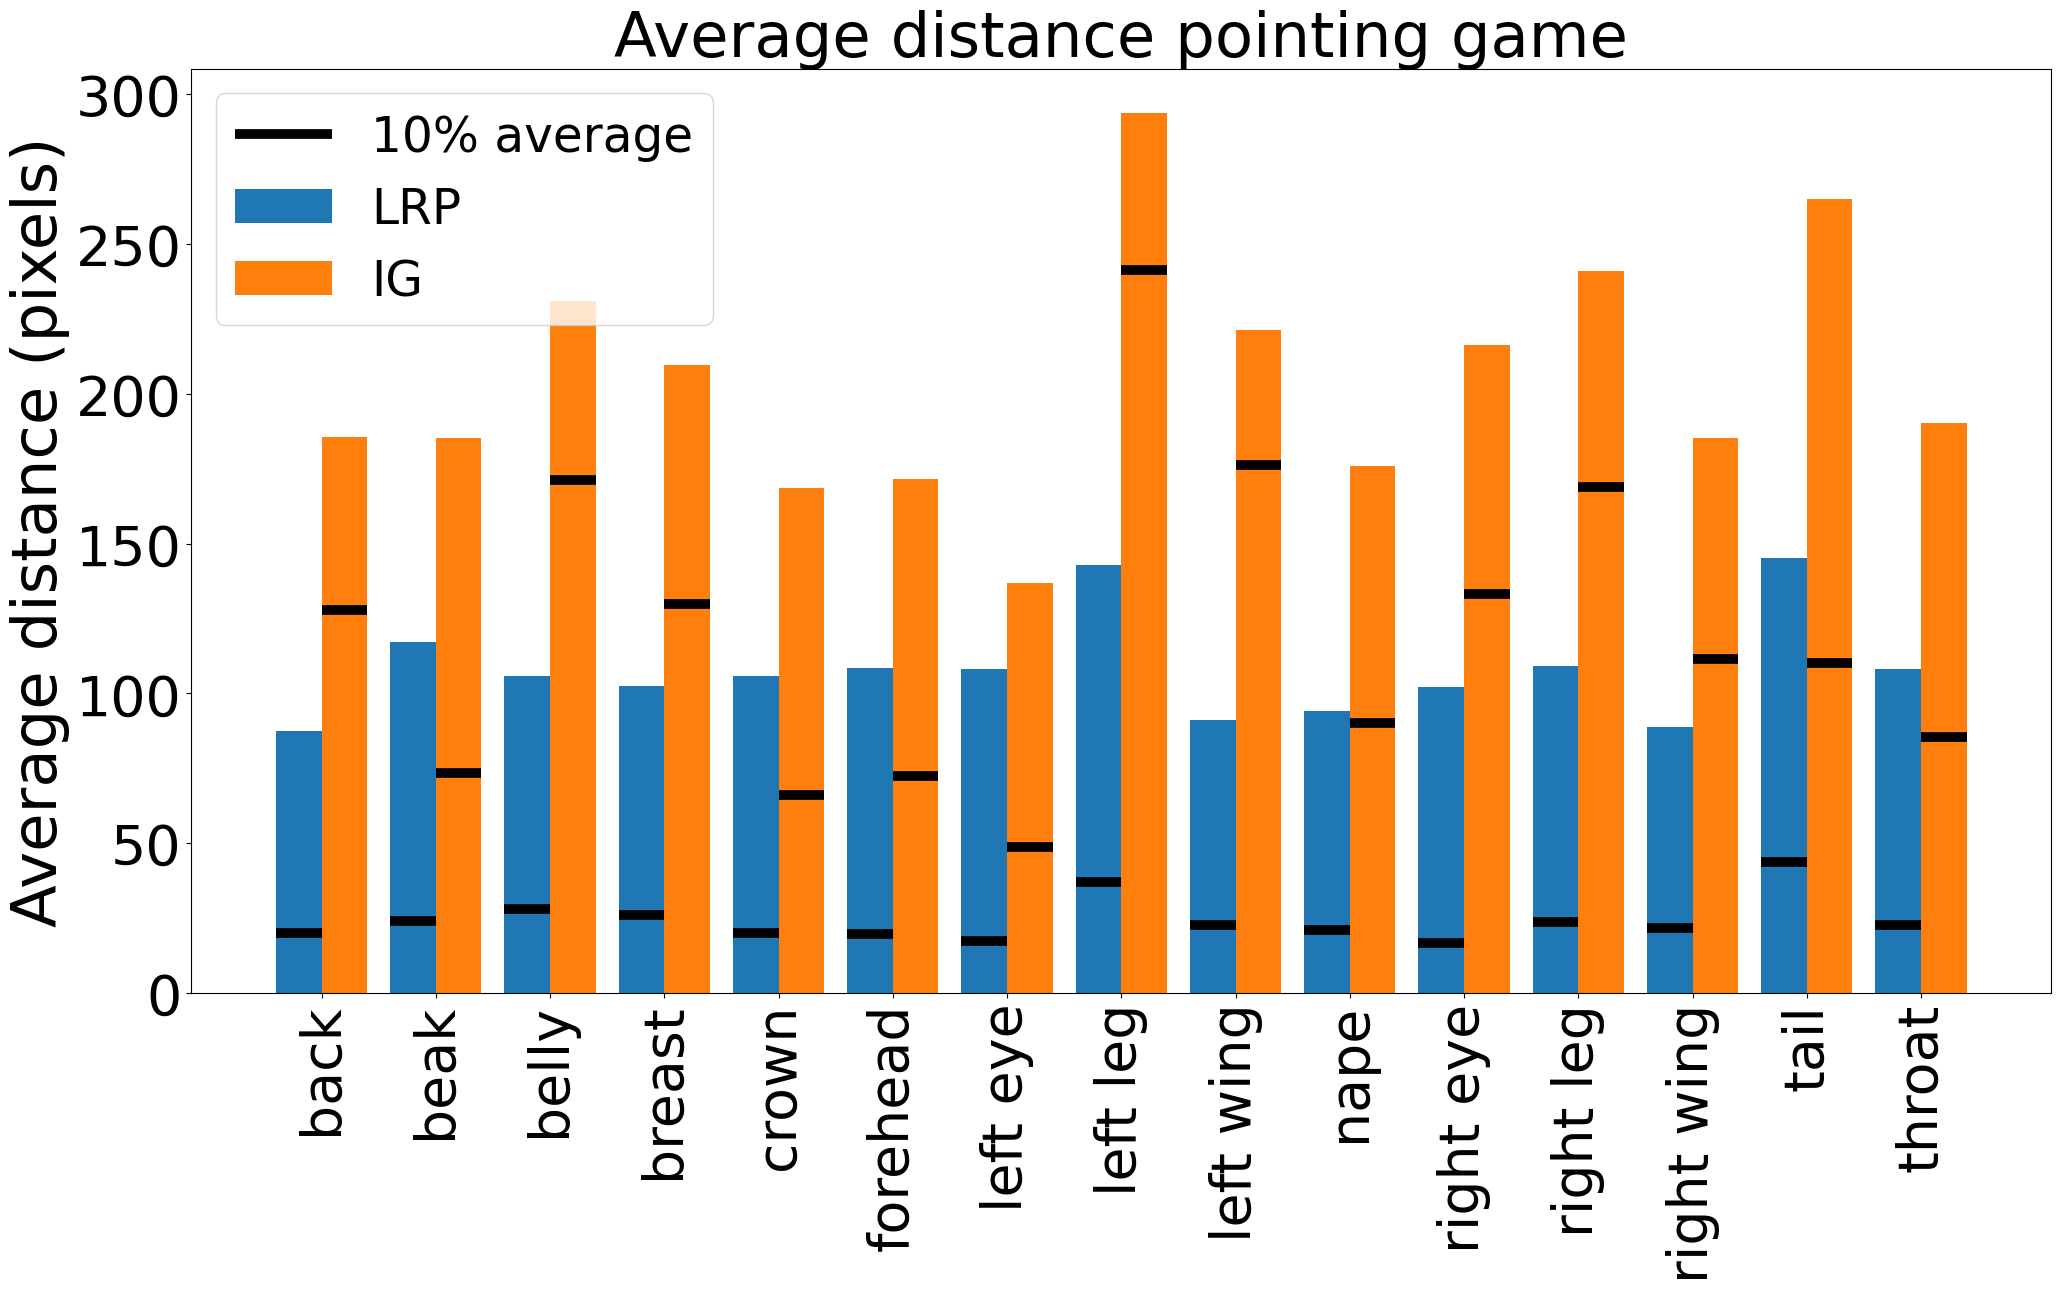

In [57]:
LRP_values = [(sum(LRP_dist[key]) / len(LRP_dist[key])) for key in range(len(LRP_dist))]
LRP_shortest_list = [(sorted(LRP_dist[key])[:int(len(LRP_dist[key])*0.1)]) for key in range(len(LRP_dist))]
LRP_shortest_values = [(sum(i) / len(i)) for i in LRP_shortest_list]
IG_values = [(sum(IG_dist[key]) / len(IG_dist[key])) for key in range(len(IG_dist))]
IG_shortest_list = [(sorted(IG_dist[key])[:int(len(IG_dist[key])*0.1)]) for key in range(len(IG_dist))]
IG_shortest_values = [(sum(i) / len(i)) for i in IG_shortest_list]
part_labels = ("back", "beak", "belly", "breast", "crown", "forehead", "left eye", "left leg", "left wing", "nape", "right eye", "right leg", "right wing", "tail", "throat")

bar_width = 0.4
fig = plt.subplots(figsize = (24, 12)) 
num_parts = len(part_labels)

ind = np.arange(num_parts)

plt.bar(ind, LRP_values, bar_width, label='LRP')
plt.bar(ind + bar_width, IG_values, bar_width, label='IG')

# shortest 10% distance average

LRP_start = ind-(bar_width/2)
LRP_end = LRP_start+bar_width
plt.hlines(LRP_shortest_values, LRP_start, LRP_end, color ='black', linewidth=7.0, label="10% average")

IG_start = (ind-(bar_width/2))+bar_width
IG_end = IG_start+bar_width
plt.hlines(IG_shortest_values, IG_start, IG_end, color ='black', linewidth=7.0)

plt.ylabel('Average distance (pixels)', fontsize=45)
plt.title('Average distance pointing game', fontsize=45)

plt.xticks(ind + bar_width / 2, part_labels, rotation='vertical', fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc='best', prop={'size': 35})
plt.show()


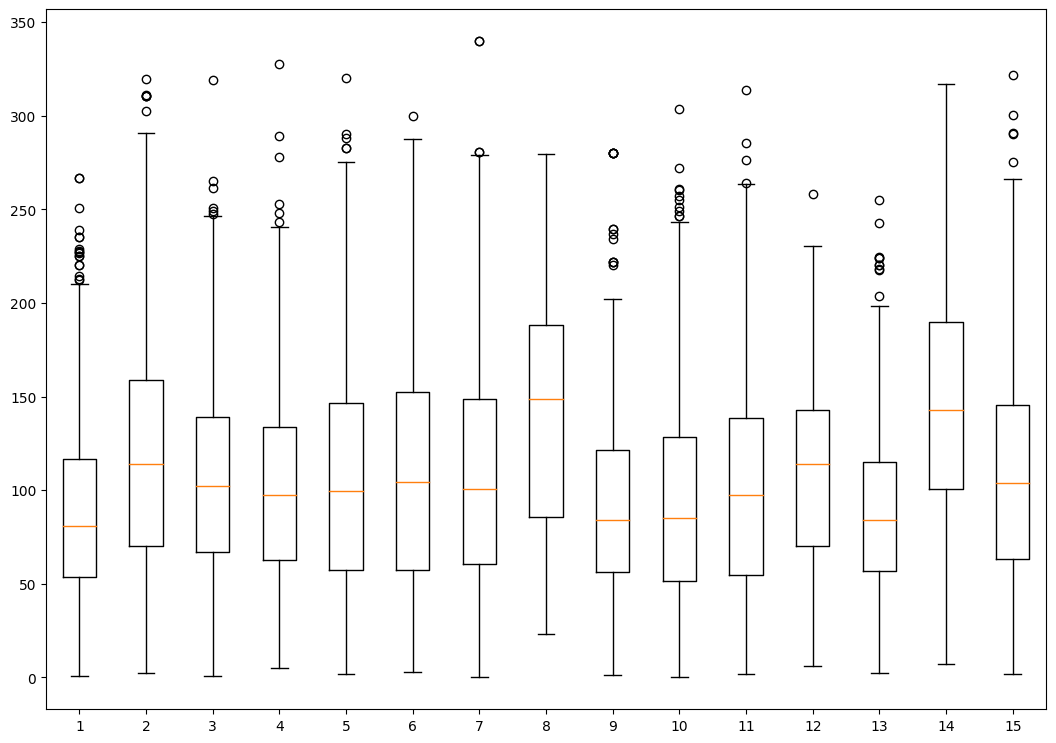

In [14]:
LRP_values = [LRP_dist[key] for key in range(len(LRP_dist))]
IG_values = [(sum(IG_dist[key]) / len(IG_dist[key])) for key in range(len(IG_dist))]
part_labels = ("back", "beak", "belly", "breast", "crown", "forehead", "left eye", "left leg", "left wing", "nape", "right eye", "right leg", "right wing", "tail", "throat")
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(LRP_values)
 
# show plot
plt.show()